# Importing Dependencies

In [46]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

# Data Description and Exploration

In [15]:
# read data 

data = pd.read_csv('premier_train_dataset.csv')
print(type(data))
data.drop(data.columns[0],axis=1,inplace=True)



data[40:50]


#HTGS       - Home Team Goals Scored (so far in the league)
#ATGS       - Away Team Goals Scored (so far in the league)
#HTGC       - Home Team Goals Conceded (so far in the league)
#ATGC       - Away Team Goals Conceded (so far in the league)
#FTHG       - Full Time Home Goals (in the match)
#FTAG       - Full Time Away Goals (in the match)
#FTR        - Full Time Result (H- Home Win; D - Draw; A - Away Win)
#HomeTeamLP - Home Team League Position
#AwayTeamLP - Away Team League Position
#HTFormPts  - Home Team sum of points in the last 5 games
#ATFormPts  - Away Team sum of points in the last 5 games
#HTGD       - Home Team Goal Diference (so far in the league)
#ATGD       - Away Team Goal Diference (so far in the league)
#MW         - Match Week
#HTGS       - Home Team Points (so far in the league)
#ATGS       - Away Team Points (so far in the league)

<class 'pandas.core.frame.DataFrame'>


,HomeTeam,AwayTeam,HTGS,ATGS,HTGC,ATGC,FTHG,FTAG,FTR,HomeTeamLP,AwayTeamLP,HTFormPts,ATFormPts,HTGD,ATGD,MW,HTP,ATP
40,Coventry,Leeds,5,5,7,3,0,0,D,14.0,3.0,6,7,0,0,5.0,7,4
41,Ipswich,Aston Villa,4,4,6,5,1,2,A,18.0,6.0,4,5,-1,-1,5.0,4,4
42,Leicester,Southampton,3,7,1,8,1,0,H,8.0,15.0,8,3,3,-2,5.0,10,2
43,Liverpool,Man City,7,7,6,9,3,2,H,4.0,18.0,7,6,1,1,5.0,7,6
44,Man United,Sunderland,11,4,3,6,3,0,H,1.0,7.0,8,4,9,-6,5.0,8,1
45,Middlesbrough,Everton,8,7,7,7,1,2,A,12.0,13.0,5,4,-2,3,5.0,2,7
46,Newcastle,Chelsea,7,7,4,7,0,0,D,11.0,5.0,9,5,5,-2,5.0,10,3
47,Derby,Charlton,9,8,10,9,2,2,D,16.0,18.0,3,4,-1,-5,5.0,3,2
48,Tottenham,West Ham,7,5,6,8,1,0,H,10.0,9.0,7,2,0,-2,5.0,7,2
49,Arsenal,Coventry,9,5,6,7,2,1,H,2.0,14.0,7,6,5,-1,5.0,11,7


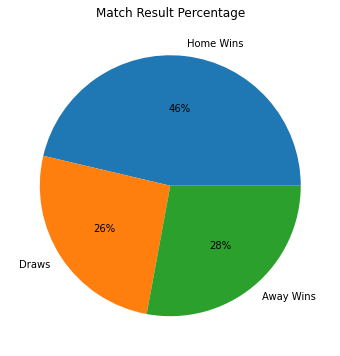

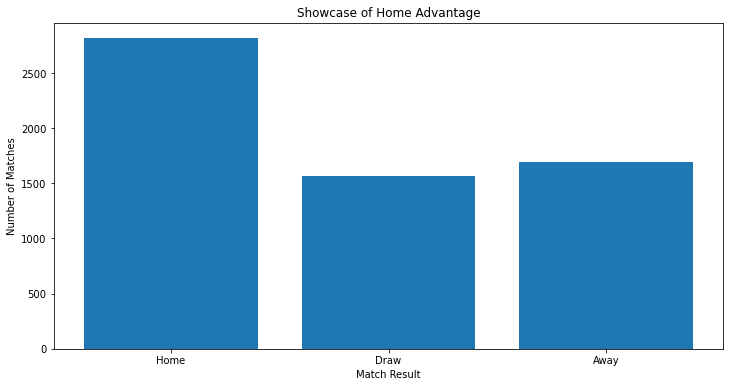

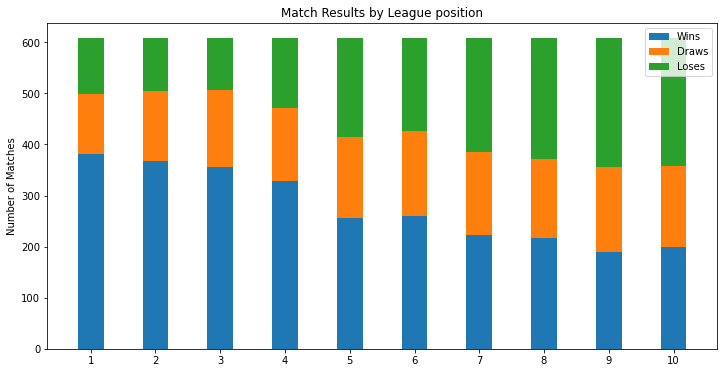

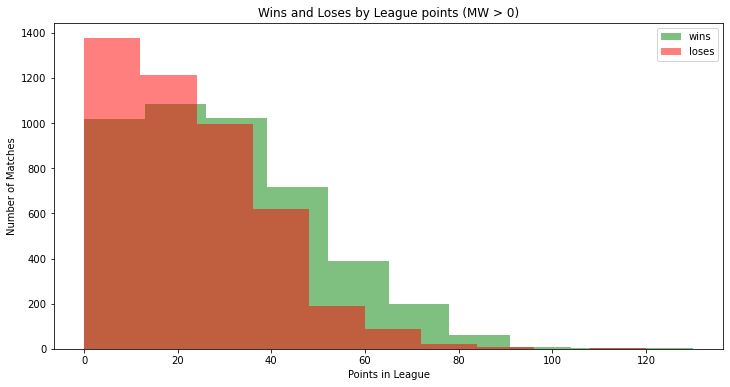

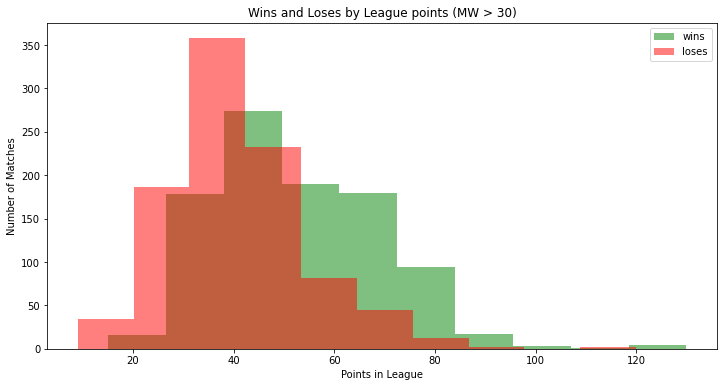

In [7]:

plt.rcParams["figure.figsize"] = (12, 6)
# Total number of matches.
n_matches = data.shape[0]

# Calculate H/D/A totals.
n_homewins = len(data[data.FTR == 'H'])
n_draws = len(data[data.FTR == 'D'])
n_awaywins = len(data[data.FTR == 'A'])

# Calculate H/D/A percentages.
home_win_rate = (float(n_homewins) / (n_matches)) * 100
draw_rate = (float(n_draws) / (n_matches)) * 100
away_win_rate = (float(n_awaywins) / (n_matches)) * 100

#Plot pie chart
pie_y = [n_homewins, n_draws, n_awaywins]
pie_labels = ["Home Wins", "Draws", "Away Wins"]
plt.pie(pie_y, labels = pie_labels, autopct='%1.0f%%')
plt.title("Match Result Percentage")
plt.show()

#Plot bar chart
bar_x = np.array(["Home", "Draw", "Away"])
bar_y = np.array([n_homewins, n_draws, n_awaywins])
plt.bar(bar_x,bar_y)
plt.xlabel("Match Result")
plt.ylabel("Number of Matches")
plt.title("Showcase of Home Advantage")
plt.show()

#Plot Bar Chart of League position W/D/L #######################################


#labels = np.flip(labels)
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']

wins = np.zeros(18)
draws = np.zeros(18)
loses = np.zeros(18)


for index, row in data.iterrows():
    if row['FTR']=='H':
        wins[int(row['HomeTeamLP'])-1]+=1
        loses[int(row['AwayTeamLP'])-1]+=1
    elif row['FTR']=='A':
        loses[int(row['HomeTeamLP'])-1]+=1
        wins[int(row['AwayTeamLP'])-1]+=1
    else:
        draws[int(row['HomeTeamLP'])-1]+=1
        draws[int(row['AwayTeamLP'])-1]+=1

# O dataset tem uma cena estranha, bué equipas na posição 18, mesmo que faça só apartir de MW 10

labels = labels[0:10]
wins = wins[0:10]
draws = draws[0:10]
loses = loses[0:10]

fig, ax = plt.subplots()
width = 0.4

ax.bar(labels, wins, width, label='Wins')
ax.bar(labels, draws, width, bottom=wins,
       label='Draws')
ax.bar(labels, loses, width, bottom=wins+draws,
       label='Loses')

ax.set_ylabel('Number of Matches')
ax.set_title('Match Results by League position')
ax.legend()

plt.show()


# Points in league vs wins
def gen_hist(mw):
    hist_wins = []
    hist_loses = []

    for index, row in data.iterrows():
        if row['MW'] > mw:
            if row['FTR']=='H':
                hist_wins.append(row['HTP'])
                hist_loses.append(row['ATP'])
            elif row['FTR']=='A':
                hist_wins.append(row['ATP'])
                hist_loses.append(row['HTP'])


    plt.hist(hist_wins, color='green', alpha=0.5, label='wins')
    plt.hist(hist_loses, color='red', alpha=0.5, label='loses')
    plt.legend(loc='upper right')
    plt.xlabel("Points in League")
    plt.ylabel("Number of Matches")
    plt.title("Wins and Loses by League points (MW > "+ str(mw)+")")
    plt.show()

gen_hist(0)
gen_hist(30)

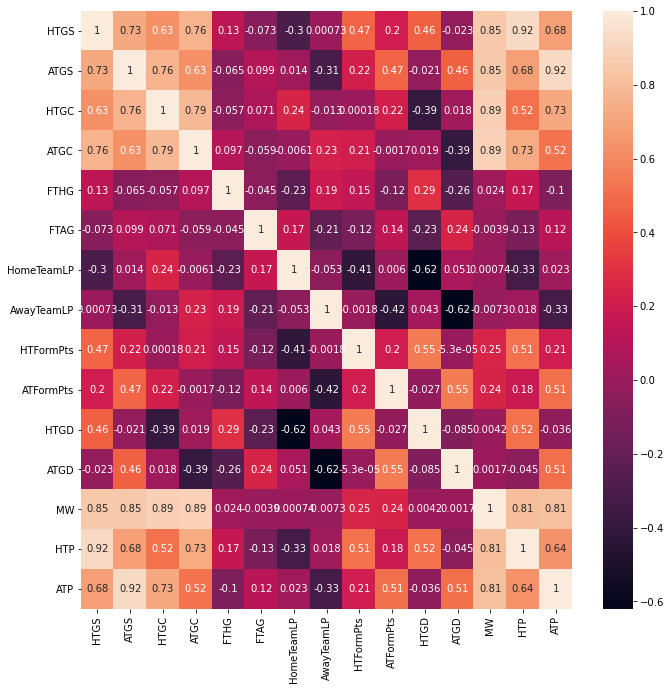

In [8]:
f, ax = plt.subplots(figsize=(11,11))
sb.heatmap(data.corr(), annot=True)
plt.show()

# Data Preparation

In [22]:
# Separate into feature set and target variable
feature_set = data.drop(['HomeTeam','AwayTeam','FTR', 'FTHG', 'FTAG'],1)
target_set = data['FTR']

cols = [['HTGS','ATGS','HTGC','ATGC','HomeTeamLP','AwayTeamLP','HTFormPts','ATFormPts','HTGD','ATGD','MW','HTP','ATP']]
for col in cols:
    feature_set[col] = scale(feature_set[col])
    
feature_set[40:50]

target_set = target_set.to_numpy()
#Rank_1 array
target_set = target_set.reshape(len(target_set),1)


## Split Data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_set, test_size = 0.20)

## SVM

In [43]:
#hyperparameter tunning

param_grid = {'C': [0.1, 1, 10, 30], 
              'gamma': [0.01, 0.1, 1, 3, 10, 30],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)

grid.fit(X_train, y_train.ravel())

best_params = grid.best_params_
best_c = best_params['C']
best_gamma = best_params['gamma']

print("best_c: ", best_c) #30
print("best_gamma: ", best_gamma) #0.01



Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.1min finished


best_c:  30
best_gamma:  0.01


In [44]:
print(feature_set.shape)
print(target_set.shape)

#svm model
svm_classifier = SVC(C=best_c, kernel="rbf", gamma=best_gamma)
svm_classifier.fit(X_train, np.ravel(y_train))
#accuarcyd
print(svm_classifier.score(feature_set,target_set ))



(6080, 13)
(6080, 1)
0.6782894736842106


In [38]:
print(feature_set.shape)
print(target_set.shape)

(6080, 13)
(6080, 1)
<class 'pandas.core.frame.DataFrame'>
0.6830592105263158
<class 'numpy.ndarray'>


In [47]:
svm_predictions = svm_classifier.predict(X_test)

print(confusion_matrix(y_test,svm_predictions))
print(classification_report(y_test,svm_predictions))

[[242  53  45]
 [ 89  80 132]
 [ 37  45 493]]
              precision    recall  f1-score   support

           A       0.66      0.71      0.68       340
           D       0.45      0.27      0.33       301
           H       0.74      0.86      0.79       575

    accuracy                           0.67      1216
   macro avg       0.61      0.61      0.60      1216
weighted avg       0.64      0.67      0.65      1216

